In [6]:
def argmin_x1(x2, x3):
    return (3/2) * x2 + x3 - 1/2

def argmin_x2(x1, x3):
    return (1/6) * x1 + (1/3) * x3 + 5/6

def argmin_x3(x1, x2):
    return (1/4) * x1 + (3/4) * x2 - 1


In [7]:
import math

def coordinate_descent(f, argmin, x_t0, max_iter=25):
    x1, x2, x3 = x_t0
    for _ in range(max_iter):
        x1 = argmin[0](x2, x3)   # update x1
        x2 = argmin[1](x1, x3)   # update x2
        x3 = argmin[2](x1, x2)   # update x3
    return (x1, x2, x3), f((x1, x2, x3))
    
x_t0=(1,20,5)

def f(x):
    x1, x2, x3 = x
    return (
        math.exp(x1 - 3*x2 + 3) +
        math.exp(3*x2 - 2*x3 - 2) +
        math.exp(2*x3 - x1 + 2)
    )

argmin=[argmin_x1,argmin_x2,argmin_x3]
coords, f_val = coordinate_descent(f, argmin, x_t0, max_iter=25)
print("Final coordinates:", coords)
print("Function value:", f_val)

Final coordinates: (26.666666666666664, 9.555555555555555, 12.833333333333332)
Function value: 8.154845485377136


KeyboardInterrupt: 

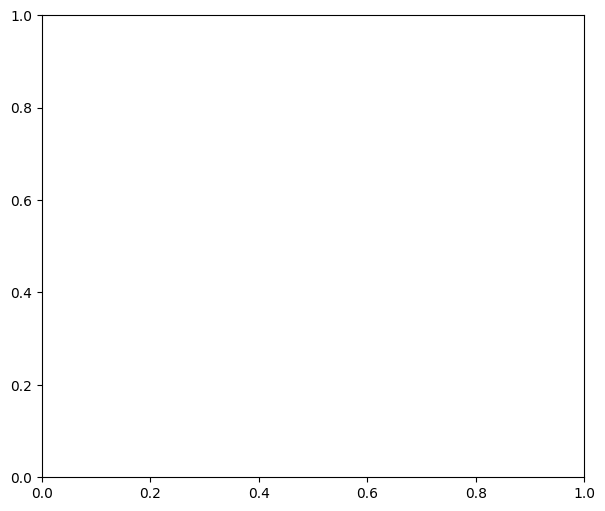

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# your function
def f(x):
    x1, x2, x3 = x
    return (
        math.exp(x1 - 3*x2 + 3) +
        math.exp(3*x2 - 2*x3 - 2) +
        math.exp(2*x3 - x1 + 2)
    )

# argmin updates
def argmin_x1(x2, x3):
    return (3/2) * x2 + x3 - 1/2

def argmin_x2(x1, x3):
    return (1/6) * x1 + (1/3) * x3 + 5/6

def argmin_x3(x1, x2):
    return (1/4) * x1 + (3/4) * x2 - 1

argmin = [argmin_x1, argmin_x2, argmin_x3]

# coordinate descent with tracking
def coordinate_descent(f, argmin, x_t0, max_iter=25):
    x1, x2, x3 = x_t0
    history = [(x1, x2, x3)]
    for _ in range(max_iter):
        x1 = argmin[0](x2, x3)   # update x1
        history.append((x1, x2, x3))
        x2 = argmin[1](x1, x3)   # update x2
        history.append((x1, x2, x3))
        x3 = argmin[2](x1, x2)   # update x3
        history.append((x1, x2, x3))
    return (x1, x2, x3), f((x1, x2, x3)), history

# run it
x_t0 = (1, 20, 5)
coords, f_val, history = coordinate_descent(f, argmin, x_t0, max_iter=25)

# slice visualization: fix x3 at the starting value
x3_fixed = x_t0[2]
x1_vals = np.linspace(-5, 10, 200)
x2_vals = np.linspace(-5, 25, 200)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = np.array([[f((x1, x2, x3_fixed)) for x1, x2 in zip(row_x1, row_x2)] 
              for row_x1, row_x2 in zip(X1, X2)])

# extract path projected onto x1-x2 plane
path = np.array([(x1, x2) for (x1, x2, x3) in history])

plt.figure(figsize=(7,6))
plt.contourf(X1, X2, Z, levels=60, cmap="viridis")
plt.colorbar(label="f(x1, x2, x3_fixed)")
plt.plot(path[:,0], path[:,1], marker="o", color="red", markersize=3, linewidth=1)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title(f"Coordinate Descent Path (x3 fixed={x3_fixed})")
plt.show()

print("Final coordinates:", coords)
print("Final function value:", f_val)
